In [1]:
#Libraries
import pandas as pd
import numpy as np
!pip install yfinance
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.graph_objs as go

     |████████████████████████████████| 6.3 MB 11.7 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=f0597393adf54f54a221a384ce0c340c2be7bfac5b291ea1650e9538a8b0d869
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
#download data 
def get_data (symbol="BTC-USD"):
  data = yf.download(tickers=symbol,period= '7d',interval='1m')
  return data

#Calculate bollinger bands with roll=60 and confidence 1
def get_BB(data,roll=60,alpha=1):
  data['Middle Band'] = data ['Open'].rolling(window=roll).mean()
  data['Upper Band'] = data ['Middle Band'] + alpha*data ['Open'].rolling(window=roll).std()
  data['Lower Band'] = data ['Middle Band'] - alpha*data ['Open'].rolling(window=roll).std()
  return data

#Benefit during the period by Bollinger Bands
def get_trading(data,initial=1000):
  benefit = initial
  #benefit percentage
  percben = 0
  #number of shares
  nshare = 0 #nshare = 0
  signal = 0
  got = 0
  MB = data['Middle Band']
  LB = data['Lower Band']
  UB = data['Upper Band']
  Price = data ['Open']
  for i in range(LB.size):
    #If it's out of the band
    if (Price[i]<= LB[i] or Price[i]>=UB[i]):
      signal = 1
    else:
      signal = 0
    #If it's under the band and i don't have shares i buy
    if (Price[i]<=LB[i] and signal==1 and got == 0):
      buy = Price[i] 
      nshare = benefit/buy
      benefit -= nshare*buy
      got = 1

    #If it's over the band, the price is over i bought and i got shares i sell
    if (Price[i]>=UB[i] and signal==1 and got == 1 and Price[i]>=buy):
      sell = Price[i]
      benefit = nshare*sell
      nshare = 0
      got = 0
  #print()
  #print("Initial inversion: ",initial)
  if (benefit>0.1):
    perc_benefit = 100*(benefit-initial)/initial
  else:
    benefit = nshare*Price[-1]
    perc_benefit = 100*(nshare*Price[-1]-initial)/initial

    #print()
    #print("Change of price in time: ",100*(Price[-1]-Price[0])/Price[0],"%")
    #print("if I buy at the beginning and sell at the end: ", Price[-1]*initial/Price[0])
  return benefit,perc_benefit
def get_plot(data):
  plt.figure(figsize=(15,15))
  plt.title(' Bollinger Bands')
  plt.xlabel('Days')
  plt.ylabel('Closing Prices')
  plt.plot(data['Close'], label='Closing Prices')
  plt.plot(data['Middle Band'], label='Middle Band',c='b')
  plt.plot(data['Upper Band'], label='Bollinger Up', c='g')
  plt.plot(data['Lower Band'], label='Bollinger Down', c='r')

  plt.legend()
  plt.show()




In [3]:
df = get_data()
df = get_BB(df)
benefit,perc_benefit = get_trading(df)
print(benefit,perc_benefit)

[*********************100%***********************]  1 of 1 completed
1031.998958921712 3.1998958921712073


In [4]:
import math
max_benefit = 0
max_i = 0
df = get_data()
max_roll = math.floor(round(0.05*df.shape[0],2))
for i in range(1,max_roll):
  #print("Roll number: ",i)
  df = get_BB(df,roll=i)
  benefit,perc_benefit = get_trading(df)
  if (benefit>max_benefit):
    print()
    print("New max benefit roll: ",i)
    max_benefit = benefit
    max_i = i
    print(max_benefit)
    print()
print()
print("Max benefit at roll: ",max_i," Max benefit: ",max_benefit)


[*********************100%***********************]  1 of 1 completed

New max benefit roll:  1
1000


New max benefit roll:  3
1014.841819127732


New max benefit roll:  4
1021.7267676331574


New max benefit roll:  5
1022.9776156959392


New max benefit roll:  6
1023.4847289450794


New max benefit roll:  11
1029.2845415750817


New max benefit roll:  12
1031.0240698083821


New max benefit roll:  13
1038.647539139861


New max benefit roll:  15
1043.129265144275


New max benefit roll:  18
1044.7916945675897


New max benefit roll:  19
1047.396351768148


New max benefit roll:  95
1049.0363724429142


New max benefit roll:  96
1051.2785566108412


New max benefit roll:  97
1052.1016430446784


New max benefit roll:  98
1055.3083478217686


New max benefit roll:  105
1055.918436389077


New max benefit roll:  106
1055.929977873574


New max benefit roll:  107
1056.420458309411


New max benefit roll:  108
1059.6149718277497


New max benefit roll:  114
1059.8226486016504


New max ben

[*********************100%***********************]  1 of 1 completed


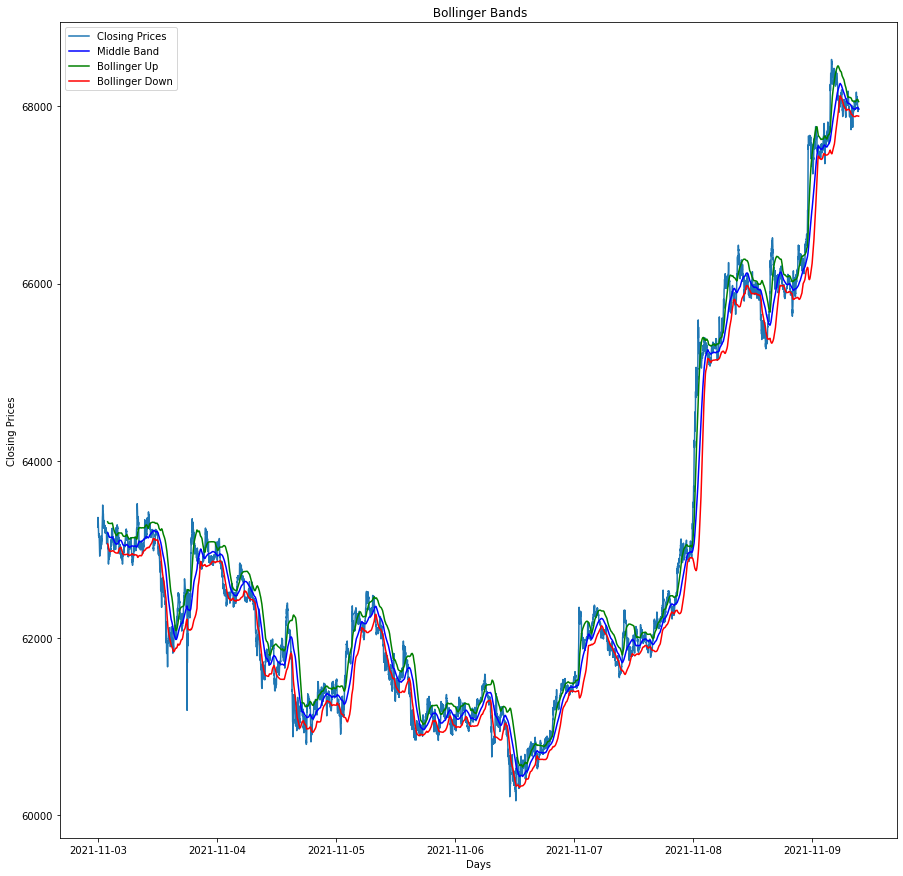

In [5]:
df = get_data()
df = get_BB(df,roll=max_i)
get_plot(df)

In [6]:
initial=1000
#Print  the benefit per one
p_one = 1+(max_benefit-initial)/initial;p_one


1.0619472303495017

In [7]:
#difference of price from first row to the last
(df['Close'][-1]/df['Close'][0])

1.07450057462711